In [3]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/archive.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive.zip")
zip_ref.extractall()
zip_ref.close()

In [2]:
import os

#walk. through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("archive/training"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 1 images in 'archive/training'.
There are 0 directories and 1300 images in 'archive/training/kitchen'.
There are 0 directories and 1300 images in 'archive/training/knife'.
There are 0 directories and 1300 images in 'archive/training/chair'.
There are 0 directories and 1300 images in 'archive/training/saucepan'.


In [3]:
#Steup the train and test directories
train_dir = "archive/training/"
test_dir = "archive/testing/"

In [4]:
#Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]
print(class_names)

['chair' 'kitchen' 'knife' 'saucepan']


In [ ]:
# #Lets get the class names
# import pathlib
# import numpy as np
# #data_dir = pathlib.Path(train_dir)
# class_names = os.listdir(train_dir)
# list1=[]
# for line in class_names:
#     Type = line.split('_')[0]
#     list1.append(Type)


In [5]:
# Visualising the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir,target_class):
  #Setup the target directory 
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['knife_278.jpg']
Image shape: (800, 800, 3)


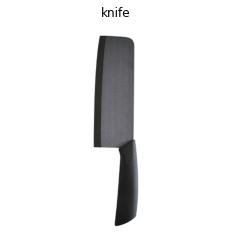

In [6]:
#Visualise 
import random
img = view_random_image(target_dir=train_dir,
                                      target_class = random.choice(class_names))

In [10]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Load data in from directories and turn it to batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 5200 images belonging to 4 classes.
Found 1267 images belonging to 4 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPool2D,Dense,Activation

#1. Create the model
model_1 = Sequential([
    Conv2D(10,3 ,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(4,activation="softmax") #change to have 10 output neurons (bcz Class_names)
])

#2. Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [11]:
#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 67s 410ms/step - loss: 0.7177 - accuracy: 0.7260 - val_loss: 0.6488 - val_accuracy: 0.7593
Epoch 2/5
163/163 [==============================] - 74s 455ms/step - loss: 0.4744 - accuracy: 0.8325 - val_loss: 0.5631 - val_accuracy: 0.7940
Epoch 3/5
163/163 [==============================] - 70s 432ms/step - loss: 0.2658 - accuracy: 0.9031 - val_loss: 0.6563 - val_accuracy: 0.7806
Epoch 4/5
163/163 [==============================] - 67s 411ms/step - loss: 0.1229 - accuracy: 0.9642 - val_loss: 0.8958 - val_accuracy: 0.7766
Epoch 5/5
163/163 [==============================] - 67s 412ms/step - loss: 0.0858 - accuracy: 0.9740 - val_loss: 0.8743 - val_accuracy: 0.7932


In [12]:
# Evaluate on test data
model_1.evaluate(test_data)

24/40 [=================>............] - ETA: 5s - loss: 0.8458 - accuracy: 0.8060

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/40 [==============================] - 13s 316ms/step - loss: 0.8743 - accuracy: 0.7932


[0.8743250966072083, 0.7932122945785522]